In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
import matplotlib.gridspec as gridspec

In [3]:
def piece_wise_prep(x,y):

    # Prepare x and y for plotting stepwise segments
    x_plot = np.repeat(x[1:], 2)
    x_plot = np.insert(x_plot, 0, x[0]) 
    x_plot = x_plot[:-1]
    
    y_plot = np.repeat(y, 2)
    
    return x_plot,y_plot

In [4]:
# Example data points
lw = 2
x = np.array([0.25 , 1  , 2   ,2.5 , 3  , 4  , 4.75 ])
y = np.array([0.3, 0.6, 0.49,0.5, 0.55, 0.9, 0.65])
sep = 2.5

In [5]:
index = np.searchsorted(x, sep, side='left')
nx = np.insert(x, index, sep)
s = np.array([0.7,0.8,0.85,0.87,0.95,1.0,0.9,0.85])-0.5
rhs_sum = np.array([0.7,0.83,0.89,0.93,0.985,0.905,0.87])-0.5
rhs_extra = np.insert(rhs_sum, index, rhs_sum[index])

In [6]:
x_smooth = np.linspace(0, 5, 300)
x1 = x_smooth[x_smooth<=sep+0.5]
x2 = x_smooth[x_smooth>=sep-0.5]

# Create spline interpolation of the data
spline1 = make_interp_spline(x[x<=sep], y[x<=sep])
spline2 = make_interp_spline(x[x>=sep], y[x>=sep])
y1 = spline1(x1,extrapolate = True)
y2 = spline2(x2,extrapolate = True)

In [7]:
dtt = np.diff(nx)
ds = np.diff(s)
dsdt = ds/dtt
dsdt = dsdt[~np.isinf(dsdt)]

/tmp/ipykernel_496589/1122933188.py:3: RuntimeWarning: divide by zero encountered in divide
  dsdt = ds/dtt


In [8]:
dt = np.diff(x)
rhs_contr = np.diff(rhs_sum)
rhs = rhs_contr/dt

In [9]:
xp,rhs_p = piece_wise_prep(x,rhs)
_,dsdt_p = piece_wise_prep(x,dsdt)

In [10]:
small = 0.01
large = -1000

In [11]:
rea = np.array([0.18,0.12,0.13,0.123,0.01,0.02])
dif = rhs-rea
_,rea_p = piece_wise_prep(x,rea)
_,dif_p = piece_wise_prep(x,dif)

dif_sum = np.insert(np.cumsum(dif*dt),0,0)
rea_sum = np.insert(np.cumsum(rea*dt),0,0)

In [12]:
c1 = 'b'
c2 = 'g'

In [48]:
# Create smooth x values
def traj(ax):

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    for i in range(1,5):
        ax.axvline(i,color = 'k',lw = lw)
    for ix in range(4):
        iy = spline1(ix)
        if ix == 2:
            plt.text(ix-0.05,iy-0.03,r'$C_{\mathrm{w},'+rf'{ix}'+r'},t_{\mathrm{w},'+rf'{ix}'+r'}$',color = c1,va = 'top',ha = 'right')
        else:
            plt.text(ix+0.05,iy+0.03,r'$C_{\mathrm{w},'+rf'{ix}'+r'},t_{\mathrm{w},'+rf'{ix}'+r'}$',color = c1)
    for ix in range(2,6):
        iy = spline2(ix)
        if ix == 3:
            plt.text(ix-0.05,iy-0.13,r'$C_{\mathrm{w},'+rf'{ix}'+r'},t_{\mathrm{w},'+rf'{ix}'+r'}$',ha = 'right',color = c2)
        else:
            plt.text(ix-0.05,iy+0.01,r'$C_{\mathrm{w},'+rf'{ix}'+r'},t_{\mathrm{w},'+rf'{ix}'+r'}$',ha = 'right',color = c2)
    ax.text(x[0],y[0]+0.05,r'$c(t_0)$',ha = 'center',va = 'bottom',color = c1)
    ax.text(x[3],y[3]+0.09,r'$c(t^-_{j+0.5})$',ha = 'center',va = 'bottom',color = c1)
    ax.text(x[3],y[3]-0.09,r'$c(t^+_{j+0.5})$',ha = 'center',va = 'top',color = c2)
    ax.text(x[-1],y[-1]-0.05,r'$c(t_f)$',ha = 'center',va = 'top',color = c2)
    ax.text(0.125+0.07,spline1(0.125)-0.0,r'$t_{\mathrm{s,backward}}$',color = 'k')
    ax.text(0.6,spline1(0.6)-0.08,r'$t_{\mathrm{s,forward}}$',color = 'k')
    ax.set_xticks([])
    ax.set_yticks([])
    solid = np.logical_and(x1>=x[0],x1<=sep)
    ax.plot(x1[solid], y1[solid],'-',color = c1)
    ax.plot(x1[x1>=sep], y1[x1>=sep],'--',color = c1)
    ax.plot(x1[x1<=x[0]], y1[x1<=x[0]],'--',color = c1)
    solid = np.logical_and(x2<=x[-1],x2>=sep)
    ax.plot(x2[solid], y2[solid],'-',color = c2)
    ax.plot(x2[x2>=x[-1]], y2[x2>=x[-1]],'--',color = c2)
    ax.plot(x2[x2<=sep], y2[x2<=sep],'--',color = c2)
    plt.scatter(x, y, color='darkgrey',zorder = 10)
    ax.set_xlim(0,5)
    ax.set_ylim(0,1)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    # ax.set_aspect('equal')

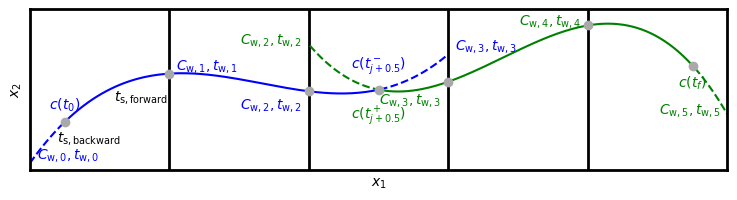

In [49]:
fig = plt.figure(figsize = (9,12))
gs = gridspec.GridSpec(ncols=1, nrows=5, figure=fig,height_ratios= [1.1,1,1,1,1],hspace = 0.3)
ax = fig.add_subplot(gs[0, 0])
traj(ax)

In [19]:
dif_color = '#8da0cb'
rea_color = '#fc8d62'
sal_color = 'orange'
lag_color = 'cyan'
bor_color = '#C17767'
ret_color = '#EC9DED'
adv_color = '#F1D302'

/tmp/ipykernel_496589/2067809116.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


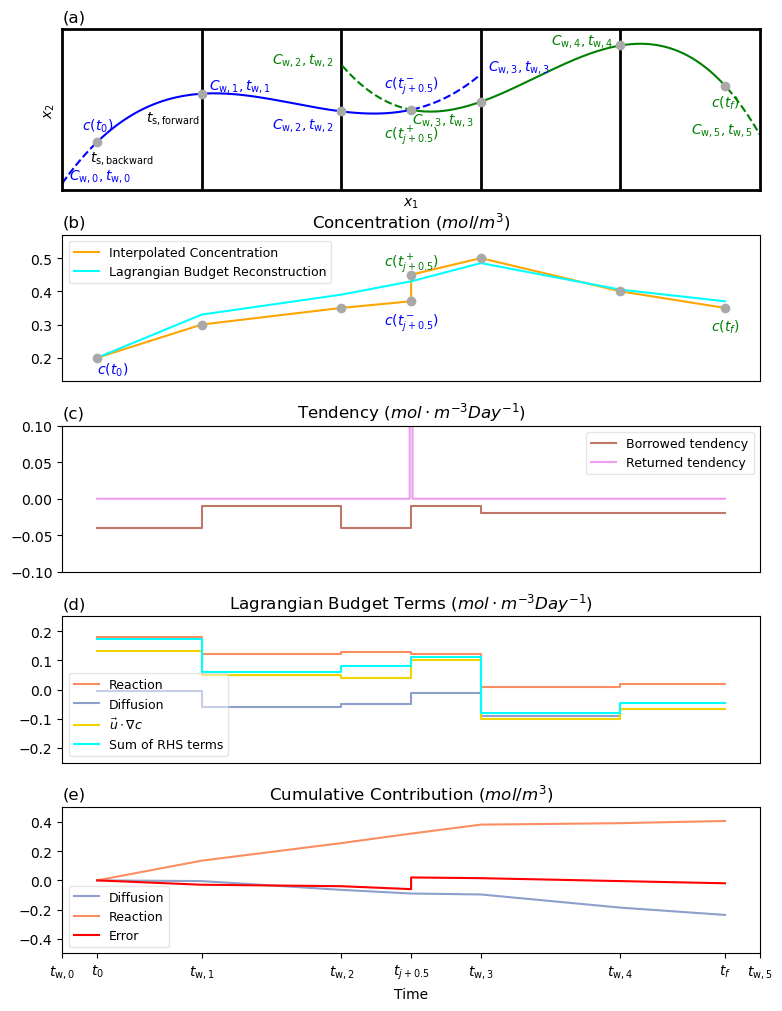

In [53]:
fig = plt.figure(figsize = (9,12))
gs = gridspec.GridSpec(ncols=1, nrows=5, figure=fig,height_ratios= [1.1,1,1,1,1],hspace = 0.3)
ax = fig.add_subplot(gs[0, 0])
traj(ax)
ax.set_title('(a)',loc = 'left')

ax = fig.add_subplot(gs[1, 0])
ax.plot(nx,s,color = sal_color,label = 'Interpolated Concentration')
ax.scatter(nx, s, color='darkgrey',zorder = 9)
ax.plot(x,rhs_sum,color = lag_color,label = 'Lagrangian Budget Reconstruction')
############################################
ax.text(x[0],s[0]-0.01,r'$c(t_0)$',color = c1,va = 'top')
ax.text(x[3],s[3]-0.03,r'$c(t^-_{j+0.5})$',color = c1,va = 'top',ha = 'center')
ax.text(x[3],s[4]+0.0,r'$c(t^+_{j+0.5})$',color = c2,va = 'bottom',ha = 'center')
ax.text(x[-1],s[-1]-0.03,r'$c(t_f)$',color = c2,va = 'top',ha = 'center')
ax.set_xlim(0,5)
ax.set_ylim(np.min(s)-0.07,np.max(s)+0.07)
ax.set_xticks([])
ax.legend(fontsize = 9,framealpha=0.5)
ax.set_title(r'Concentration ($mol/m^3$)')
ax.set_title('(b)',loc = 'left')

ax = fig.add_subplot(gs[2, 0])
ax.plot(xp,-(rhs_p-dsdt_p),color = bor_color,label = 'Borrowed tendency')
ax.plot([x[0],sep - small,sep,sep+small,x[-1]],[0,0,-large,0,0],color = ret_color,label = 'Returned tendency')
ax.set_ylim(-0.1,0.1)
ax.set_xlim(0,5)
ax.set_xticks([])
ax.legend(fontsize = 9,framealpha=0.5)
ax.set_title(r'Tendency ($mol\cdot m^{-3}Day^{-1}$)')
ax.set_title('(c)',loc = 'left')


ax = fig.add_subplot(gs[3, 0])
ax.plot(xp,rea_p,color = rea_color,label = 'Reaction')
ax.plot(xp,dif_p,color = dif_color,label = 'Diffusion')
ax.plot(xp,dsdt_p,color = adv_color,label = r'$\vec u\cdot \nabla c$')
ax.plot(xp,rhs_p,color = lag_color,label = 'Sum of RHS terms')
ax.set_xlim(0,5)
ax.set_ylim(-0.25,0.25)
ax.set_xticks([])
ax.legend(fontsize = 9,framealpha=0.5)
ax.set_title(r'Lagrangian Budget Terms ($mol\cdot m^{-3}Day^{-1}$)')
ax.set_title('(d)',loc = 'left')

ax = fig.add_subplot(gs[4, 0])
ax.plot(x,dif_sum,color = dif_color,label = 'Diffusion')
ax.plot(x,rea_sum,color = rea_color,label = 'Reaction')
ax.plot(nx,s-rhs_extra,'r',label = 'Error')
ax.set_xlim(0,5)
ax.set_ylim(-0.5,0.5)
ax.legend(fontsize = 9,framealpha=0.5)
ax.set_title(r'Cumulative Contribution ($mol/m^3$)')
ax.set_xlabel('Time')
ax.set_xticks([0]+list(x)+[5],[r"$t_{\mathrm{w},0}$",r"$t_0$",r"$t_{\mathrm{w},1}$",r"$t_{\mathrm{w},2}$",r"$t_{j+0.5}$",r"$t_{\mathrm{w},3}$",r"$t_{\mathrm{w},4}$",r"$t_f$",r"$t_{\mathrm{w},5}$"])
ax.set_title('(e)',loc = 'left')

plt.tight_layout()
plt.savefig('schematics2.pdf',format = 'pdf',dpi = 200)